In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Fungi EggNOG Database analysis

- 자실체를 만드는 fungi 와 만들지 않는 fungi 분류 정보를 통해 자실체를 만드는 관여하는 gene family를 특정해보자.

In [95]:
# geneFamily Count Matrix
df = pd.read_csv('./data/geneFamily_counts.csv')
df = df.rename(columns={'Unnamed: 0' : 'geneFamily'}).set_index('geneFamily')

df.head()

,Tetrapisispora blattae,Tetrapisispora phaffii,Naumovozyma castellii,Naumovozyma dairenensis,Kluyveromyces lactis,Eremothecium gossypii,Vanderwaltozyma polyspora,Lachancea thermotolerans,Kazachstania africana,Eremothecium cymbalariae,...,Serpula lacrymans,Cladophialophora carrionii,Schizosaccharomyces cryophilus,Metarhizium acridum,Rhizopus delemar,Exserohilum turcicum,Eutypa lata,Heterobasidion irregulare,Sclerotinia sclerotiorum,Cordyceps militaris
geneFamily,,,,,,,,,,,,,,,,,,,,,
3NTVE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3NTVF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3NTVG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3NTVH,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3NTVI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
# Fungi Fruit Body Info

df_info = pd.read_csv('data/fungi_info.csv')

def trans_info(fb):
    if fb == 'o':
        return 1
    else:
        return 0
    
df_info['Y'] = list(map(lambda x : trans_info(x), df_info['fruitBody']))

In [6]:
# Data processing

dic_Y = dict(df_info[['species', 'Y']].values)

df_selected = df[df_info['species']]

X = df_selected.T.values
Y = [dic_Y[x] for x in df_selected.columns]

### RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf  = RandomForestClassifier(n_estimators=5000, n_jobs=100, random_state=31)
rf.fit(X,Y)
fi = rf.feature_importances_ 

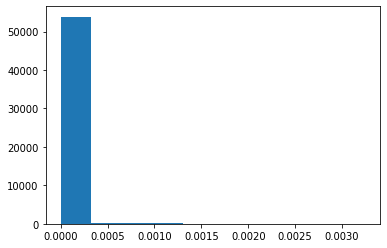

In [55]:
plt.hist(fi)
plt.show()

In [97]:
cut = np.percentile(fi[(fi != 0 )],99)
print(cut)

0.0013929228978247178


In [66]:
m = fi > cut
df_m = df_selected[m]
df_m.columns = [str(dic_Y[x]) + '_' +x for x in df_m.columns]
c =  sorted(df_m.columns)[::-1]

df_sorted = df_m[c]

In [100]:
print(f'RandomForest로 특정된 후보 geneFamily 개수 : {df_sorted.shape[0]}')

RandomForest로 특정된 후보 geneFamily 개수 : 119


### 대충 그림 그리기

In [68]:
def colIX(x):
    if x.split('_')[0] == '1':
        return True
    else:
        return False

    
m1 = [colIX(x) for x in df_sorted.columns]
m2 = [not x for x in m1]

df_fruit = df_sorted[df_sorted.columns[m1]]
df_not = df_sorted[df_sorted.columns[m2]]

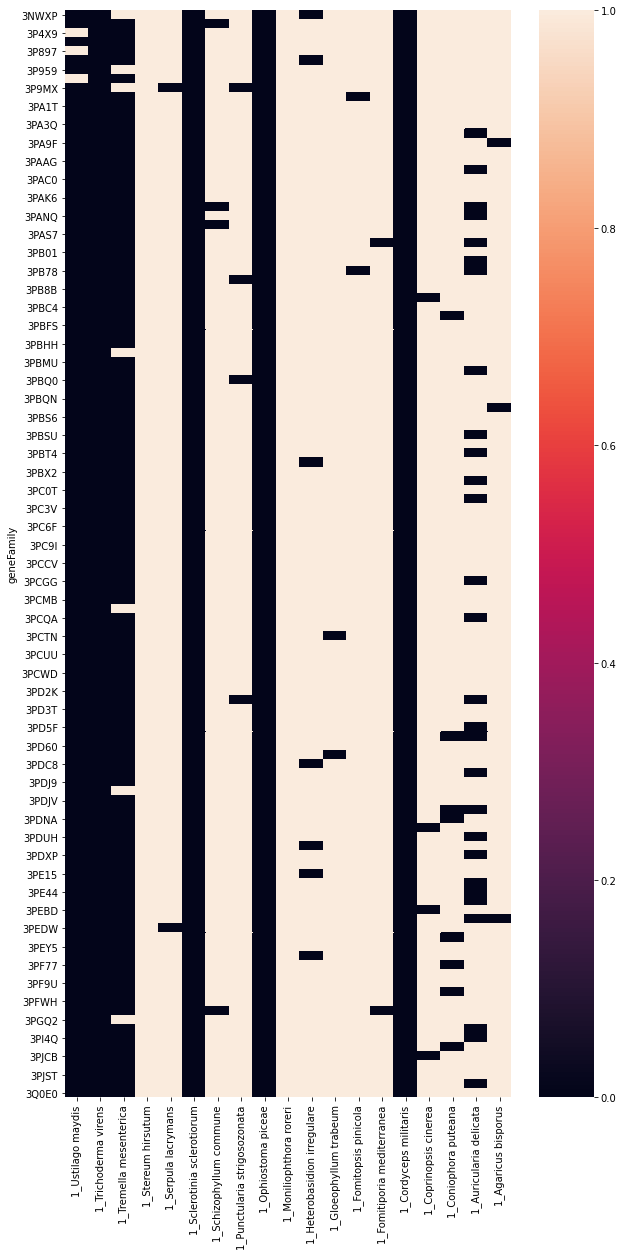

In [76]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(df_fruit)
plt.show()

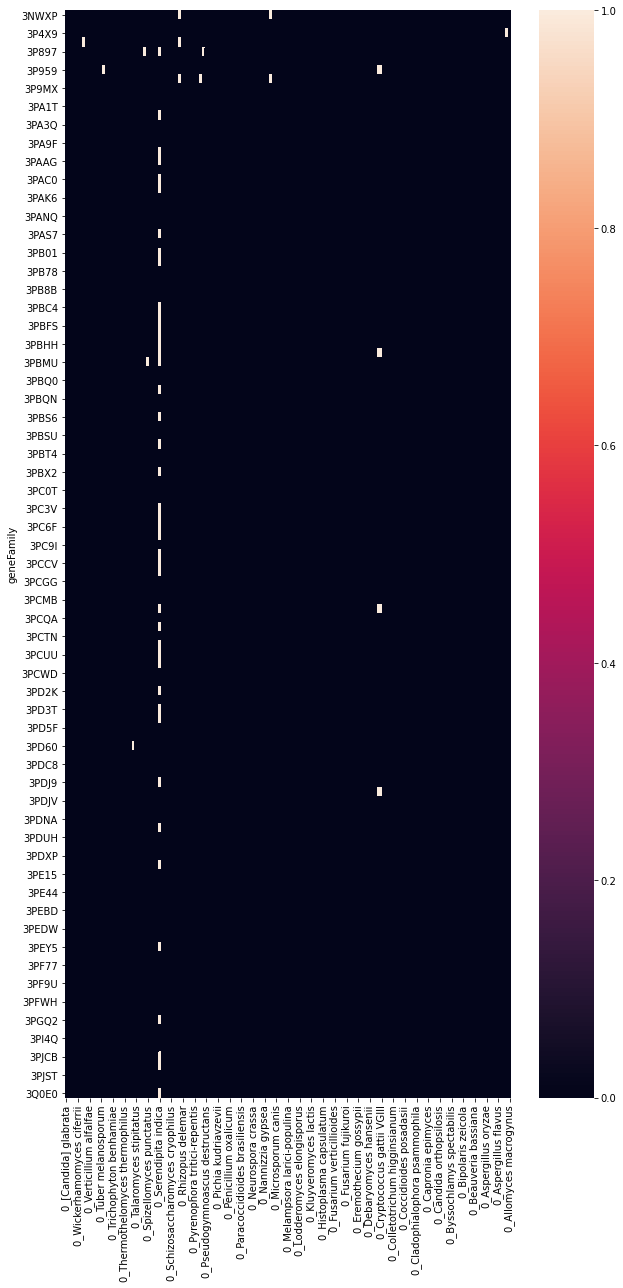

In [77]:
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(df_not)
plt.show()

# 알려져있는 자실체에 관여하는 gene family 3PBQN (cfs1)

- 포함되어 있음 나이스!

In [101]:
m = df_sorted.index == '3PBQN'

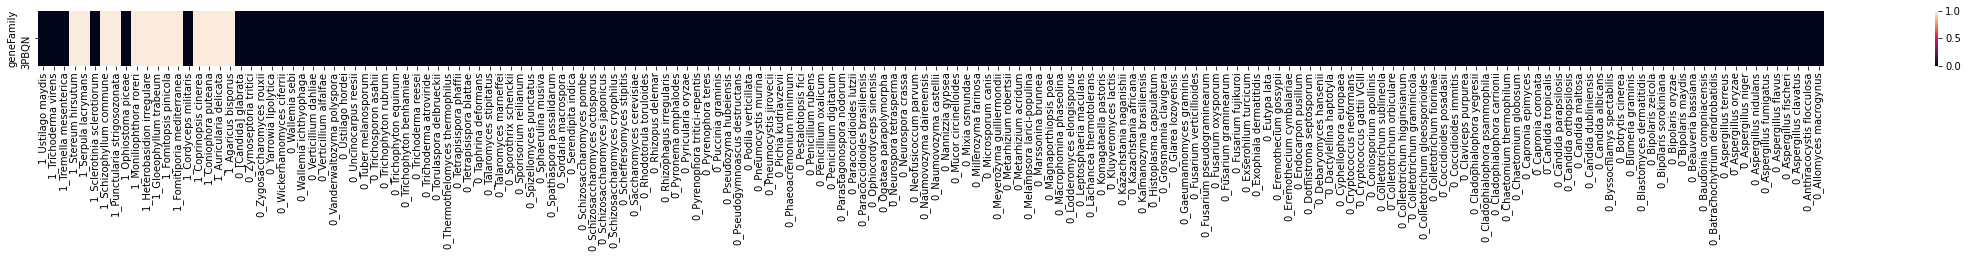

In [105]:
fig, ax = plt.subplots(figsize=(40,1))
sns.heatmap(df_sorted.loc[df_sorted.index[m]])
plt.show()